## Essential Functionality

In [1]:
import pandas as pd
import numpy as np

In [2]:
obj = pd.Series([4.5,7.2,-5.3,3.6], index=['d','b','a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [3]:
obj2 = obj.reindex(['a','b','c','d','e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [4]:
obj3 = pd.Series(['blue','purple','yellow'],index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [5]:
obj3 = obj3.reindex(range(6), method='ffill')
obj3

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [6]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)),
                     index=['a','c','d'],
		     columns=['Ohio','Texas','California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [7]:
frame2 = frame.reindex(['a','b','c','d'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [8]:
states=['Texas','Utah','California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [9]:
# Looks like this used to work, but now throws an error
frame.loc[['a','b','c','d'], states]


KeyError: "['b'] not in index"

In [ ]:
obj = pd.Series(np.arange(5.), index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [ ]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                    index=['Ohio','Colorado','Utah','New York'],
		    columns=['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.drop(['Colorado','Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [ ]:
data.drop(['two','four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [ ]:
obj.drop('c', inplace=True)

In [ ]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

## Indexing, Selection, and Filtering


In [ ]:
obj = pd.Series(np.arange(4.),
                index=['a','b','c','d'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [ ]:
obj['b']

1.0

In [ ]:
obj[1]

1.0

In [ ]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [ ]:
obj[['b','a','d']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [ ]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [ ]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [ ]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [ ]:
obj['b':'c'] = 5

In [ ]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                    index=['Ohio','Colorado','Utah','New York'],
		    columns=['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [ ]:
data[['three','one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [ ]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [ ]:
data[data < 5] = 0

In [ ]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## Selection with loc and iloc


In [ ]:
data.loc['Colorado', ['two','three']]

two      5
three    6
Name: Colorado, dtype: int64

In [ ]:
data.iloc[2, [3,0,1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [ ]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [ ]:
data.iloc[[1,2],[3,0,1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [ ]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [ ]:
data.loc['Utah', 'two']

9

In [ ]:
data.iloc[:, :3][data['three'] > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [ ]:
ser = pd.Series(np.arange(3.))
ser
ser[-1]

KeyError: -1

In [ ]:
ser2 = pd.Series(np.arange(3.),
		 index=['a','b','c'])
ser2[-1]

2.0

## Arithmetic and Data Alignment

In [ ]:
s1 = pd.Series([7.3,-2.5,3.4,1.5],
		index=['a','c','d','e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
		index=['a','c','e','f','g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [ ]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3,3)),
		   columns=list('bcd'),
		   index=['Ohio','Texas','Colorado'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [ ]:
df2 = pd.DataFrame(np.arange(12.).reshape((4,3)),
		   columns=list('bde'),
		   index=['Utah','Ohio','Texas','Oregon'])
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [ ]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [ ]:
df1 = pd.DataFrame({'A':[1,2]})
df2 = pd.DataFrame({'B':[3,4]})
df1

,A
0,1
1,2


In [ ]:
df2

,B
0,3
1,4


In [ ]:
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


In [ ]:
df1 = pd.DataFrame({'A':[1,2]})
df2 = pd.DataFrame({'B':[3,4]})

In [ ]:
df1

,A
0,1
1,2


In [ ]:
df2

,B
0,3
1,4


In [ ]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)),
		   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)),
		   columns=list('abcde'))

In [ ]:
df2.loc[1, 'b'] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
1/df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [ ]:
df1.rdiv(0)

,a,b,c,d
0,NaN,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [ ]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
arr[0]

array([0., 1., 2., 3.])

In [ ]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),
		     columns=[list('bde')])
frame

,b,d,e
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,9.0,10.0,11.0


In [ ]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: 0, dtype: float64

In [ ]:
frame - series

,b,d,e
0,0.0,0.0,0.0
1,3.0,3.0,3.0
2,6.0,6.0,6.0
3,9.0,9.0,9.0


In [ ]:
series = frame.loc[:,'b']
series

,b
0,0.0
1,3.0
2,6.0
3,9.0


In [ ]:
series2 = pd.Series(range(3), index=list('bdf'))
series2

b    0
d    1
f    2
dtype: int64

In [ ]:
frame + series

,b,d,e
0,0.0,NaN,NaN
1,6.0,NaN,NaN
2,12.0,NaN,NaN
3,18.0,NaN,NaN


In [ ]:
series3 = frame['d']
frame

,b,d,e
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,9.0,10.0,11.0


In [ ]:
series3

,d
0,1.0
1,4.0
2,7.0
3,10.0


## Function Application and Mapping

In [ ]:
frame = pd.DataFrame(np.random.randn(4,3),
		     columns=list('bde'))
frame

,b,d,e
0,1.858726,0.132976,-0.202255
1,-0.039529,1.226857,-0.334092
2,-0.932934,0.486677,-0.582182
3,0.376168,2.433727,-1.362842


In [ ]:
np.abs(frame)

,b,d,e
0,1.858726,0.132976,0.202255
1,0.039529,1.226857,0.334092
2,0.932934,0.486677,0.582182
3,0.376168,2.433727,1.362842


In [ ]:
f = lambda x: x.max() - x.min()

In [ ]:
frame.apply(f)

b    2.791659
d    2.300751
e    1.160587
dtype: float64

In [ ]:
frame.apply(f, axis=0)

b    2.791659
d    2.300751
e    1.160587
dtype: float64

In [ ]:
frame

,b,d,e
0,1.858726,0.132976,-0.202255
1,-0.039529,1.226857,-0.334092
2,-0.932934,0.486677,-0.582182
3,0.376168,2.433727,-1.362842


In [ ]:
frame.apply(f)

b    2.791659
d    2.300751
e    1.160587
dtype: float64

In [ ]:
frame.max()

b    1.858726
d    2.433727
e   -0.202255
dtype: float64

In [ ]:
format = lambda x: '%.2f' % x

In [ ]:
frame.applymap(format)

,b,d,e
0,1.86,0.13,-0.20
1,-0.04,1.23,-0.33
2,-0.93,0.49,-0.58
3,0.38,2.43,-1.36


In [ ]:
frame['e'].map(format)

0    -0.20
1    -0.33
2    -0.58
3    -1.36
Name: e, dtype: object

## Sorting and Ranking

In [ ]:
obj = pd.Series(range(4), index=list('dabc'))
obj

d    0
a    1
b    2
c    3
dtype: int64

In [ ]:
obj.sort_index

<bound method Series.sort_index of d    0
a    1
b    2
c    3
dtype: int64>

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2,4)),
		     index=['three','one'],
		     columns=list('dabc'))
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [ ]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [ ]:

obj = pd.Series([4, 7, -3, 2])

In [ ]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [ ]:
frame = pd.DataFrame({'b':[4,7,-3,2], 'a':[0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [ ]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [ ]:
frame.sort_values(by=['a','b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [ ]:
obj = pd.Series([7,-5,7,4,2,0,4])

In [ ]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [ ]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [ ]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [ ]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2],
		      'a': [0,1,0,1],
		      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [ ]:
frame.rank(method='dense')

,b,a,c
0,3.0,1.0,2.0
1,4.0,2.0,3.0
2,1.0,1.0,4.0
3,2.0,2.0,1.0


In [ ]:
obj = pd.Series(range(5), index=['a','a','b','b','c'])

In [ ]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [ ]:
obj.index.is_unique

False

In [ ]:
obj['a']

a    0
a    1
dtype: int64

In [ ]:
obj['c']

4

In [ ]:
df = pd.DataFrame(np.random.randn(4,3),
		  index=['a','a','b','b'])
df

,0,1,2
a,0.761313,-0.693833,-0.991909
a,-1.247028,-0.589785,1.543689
b,-0.648295,-0.612005,0.120509
b,1.156370,0.325415,-0.760715


In [ ]:

df.loc['b']

,0,1,2
b,-0.648295,-0.612005,0.120509
b,1.156370,0.325415,-0.760715


## Summarizing and Computing Descriptive Statistics

In [ ]:
df = pd.DataFrame([[1.4, np.nan],[7.1, -4.5], [np.nan, np.nan], [.75, -1.3]],
		  index=list('abcd'),
		  columns=['one','two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:

df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
df.idxmax()

one    b
two    d
dtype: object

In [ ]:

df.idxmin()

one    d
two    b
dtype: object

In [ ]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [ ]:

df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [ ]:
obj = pd.Series(list('aabc') * 4)

In [ ]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [ ]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [ ]:
df.cumprod()

,one,two
a,1.400,NaN
b,9.940,-4.50
c,NaN,NaN
d,7.455,5.85


In [ ]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL','IBM','MSFT','GOOG']}

In [ ]:
all_data

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2016-12-16   29.125000   28.912500   29.117500   28.992500  177404400.0   
 2016-12-19   29.344999   28.937500   28.950001   29.160000  111117600.0   
 2016-12-20   29.375000   29.170000   29.184999   29.237499   85700000.0   
 2016-12-21   29.350000   29.195000   29.200001   29.264999   95132800.0   
 2016-12-22   29.127501   28.910000   29.087500   29.072500  104343600.0   
 ...                ...         ...         ...         ...          ...   
 2021-12-09  176.750000  173.919998  174.910004  174.559998  108923700.0   
 2021-12-10  179.630005  174.690002  175.210007  179.449997  115228100.0   
 2021-12-13  182.130005  175.529999  181.119995  175.740005  153237000.0   
 2021-12-14  177.740005  172.210007  175.250000  174.330002  139285700.0   
 2021-12-15  176.770004  172.310806  175.110001  176.139999   73240344.0   
 
  

In [ ]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})

In [ ]:
price

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-12-16,27.290113,126.730011,57.925182,790.799988
2016-12-19,27.447781,126.692001,59.152481,794.200012
2016-12-20,27.520727,127.391296,59.078102,796.419983
2016-12-21,27.546614,127.186035,59.078102,794.559998
2016-12-22,27.365416,126.980827,59.087402,791.260010
...,...,...,...,...
2021-12-09,174.559998,123.570000,333.100006,2962.120117
2021-12-10,179.449997,124.089996,342.540009,2973.500000
2021-12-13,175.740005,122.580002,339.399994,2934.090088


In [ ]:
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

In [ ]:
volume

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-12-16,177404400.0,7448148.0,42453100.0,2443800
2016-12-19,111117600.0,3091871.0,34338200.0,1232100
2016-12-20,85700000.0,2274632.0,26028400.0,951000
2016-12-21,95132800.0,3740182.0,17096300.0,1211300
2016-12-22,104343600.0,2931520.0,22176600.0,972200
...,...,...,...,...
2021-12-09,108923700.0,4601100.0,22214200.0,929000
2021-12-10,115228100.0,4965300.0,38077300.0,1081700
2021-12-13,153237000.0,6847500.0,28899400.0,1205200


In [ ]:
returns = price.pct_change()

In [ ]:
returns

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-12-16,NaN,NaN,NaN,NaN
2016-12-19,0.005777,-0.000300,0.021188,0.004299
2016-12-20,0.002658,0.005520,-0.001257,0.002795
2016-12-21,0.000941,-0.001611,0.000000,-0.002335
2016-12-22,-0.006578,-0.001613,0.000157,-0.004153
...,...,...,...,...
2021-12-09,-0.002970,0.004471,-0.005583,-0.004132
2021-12-10,0.028013,0.004208,0.028340,0.003842
2021-12-13,-0.020674,-0.012169,-0.009167,-0.013254


In [ ]:
price.pct_change()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-12-16,NaN,NaN,NaN,NaN
2016-12-19,0.005777,-0.000300,0.021188,0.004299
2016-12-20,0.002658,0.005520,-0.001257,0.002795
2016-12-21,0.000941,-0.001611,0.000000,-0.002335
2016-12-22,-0.006578,-0.001613,0.000157,-0.004153
...,...,...,...,...
2021-12-09,-0.002970,0.004471,-0.005583,-0.004132
2021-12-10,0.028013,0.004208,0.028340,0.003842
2021-12-13,-0.020674,-0.012169,-0.009167,-0.013254


In [ ]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-12-09,-0.002970,0.004471,-0.005583,-0.004132
2021-12-10,0.028013,0.004208,0.028340,0.003842
2021-12-13,-0.020674,-0.012169,-0.009167,-0.013254
2021-12-14,-0.008023,0.009626,-0.032587,-0.011820
2021-12-15,0.010383,-0.008848,-0.002619,-0.003940


In [ ]:

returns['MSFT'].corr(returns['IBM'])

0.5007854027129491

In [ ]:
returns['MSFT'].cov(returns['IBM'])

0.00014344321247197905

In [ ]:
obj = pd.Series(list('cadaabbcc'))

In [ ]:
uniques = obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [ ]:
pd.value_counts(obj.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

In [ ]:

obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
mask = obj.isin(['b', 'c'])

In [ ]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [ ]:

obj[mask].unique()

array(['c', 'b'], dtype=object)

In [ ]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
to_match = pd.Series(list('cabbca'))

In [ ]:
unique_vals = pd.Series(list('cba'))

In [ ]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

In [ ]:
data = pd.DataFrame({'Qu1':[1,3,4,3,4],
		     'Qu2': [2,3,1,2,3],
		     'Qu3': [1,5,2,4,4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
result = data.apply(pd.value_counts).fillna(0)

In [ ]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## Data loading, storage, and file formats

In [ ]:
df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
df = pd.read_csv('examples/ex1.csv', 
		 names=['a','b','c','d','message'])

In [ ]:
df

,a,b,c,d,message
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [ ]:
names = ['a','b','c','d','message']
pd.read_csv('examples/ex1.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [ ]:
parsed = pd.read_csv('examples/csv_mindex.csv', index_col=['key1','key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [ ]:
!cat examples/ex3.txt

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In [ ]:
result = pd.read_csv('examples/ex3.txt', sep='\s+')

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, aaa to ddd
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      float64
 2   C       4 non-null      float64
dtypes: float64(3)
memory usage: 128.0+ bytes


In [ ]:
pd.read_csv('examples/ex4.csv', skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
result = pd.read_csv('examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [ ]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [ ]:
result = pd.read_csv('examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [ ]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}

In [ ]:
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


In [ ]:
result = pd.read_csv('examples/ex6.csv')

In [ ]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [ ]:
pd.read_csv('examples/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [ ]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

In [ ]:
chunker

In [ ]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

In [ ]:
tot = pd.Series([])

/tmp/ipykernel_4043/1115746282.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tot = pd.Series([])


In [ ]:
for piece in chunker:
	tot = tot.add(piece['key'].value_counts(),
	              fill_value = 0)

tot = tot.sort_values(ascending=False)

In [ ]:
data = pd.read_csv('examples/ex5.csv')

In [ ]:
data.to_csv('examples/out.csv')

In [ ]:
!cat examples/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [ ]:
data.to_csv('examples/out.csv', sep='|')


In [ ]:
!cat examples/out.csv

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [ ]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [ ]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [ ]:
data.to_csv(sys.stdout, index=False, columns=list('abc'))

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [ ]:
!cat examples/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [ ]:
import csv

In [ ]:
f = open('examples/ex7.csv')


In [ ]:
reader = csv.reader(f)

In [ ]:
for line in reader:
	print(line)

In [ ]:
with open('examples/ex7.csv') as f:
	lines = list(csv.reader(f))

In [ ]:
lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [ ]:
header, values = lines[0], lines[1:]

In [ ]:
data_dict = {h: v for h, v in zip(header, zip(*values))}

In [ ]:
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [ ]:
class my_dialect(csv.Dialect):
	lineterminator = '\n'
	delimiter = ';'
	quotechar = '"'
	quoting = csv.QUOTE_MINIMAL

reader = csv.reader(f, dialect=my_dialect)

ValueError: I/O operation on closed file.

In [ ]:
import json

In [ ]:
obj = """
{"name":"Wes",
 "places_lived":["United States", "Spain", "Germany"],
 "pet": null,
 "siblings":[{"name":"Scott", "age": 30, "pets":["Zeus", "Zuko"]},
             {"name":"Katie", "age": 38, "pets":["Sixes", "Stache", "Cisco"]}]
}
"""

In [ ]:
result = json.loads(obj)

In [ ]:
json.dumps(result)

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

In [ ]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])

In [ ]:
siblings

,name,age
0,Scott,30
1,Katie,38


In [ ]:
!cat examples/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [ ]:
data =pd.read_json('examples/example.json')

In [ ]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [ ]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')

In [ ]:
len(tables)

1

In [ ]:
type(tables)

list

In [ ]:
failures = tables[0]

In [ ]:
failures

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"
...,...,...,...,...,...,...,...
542,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001","August 19, 2014"
543,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001","November 18, 2002"
544,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001","February 18, 2003"
545,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000","March 17, 2005"


In [ ]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              547 non-null    object
 1   City                   547 non-null    object
 2   ST                     547 non-null    object
 3   CERT                   547 non-null    int64 
 4   Acquiring Institution  547 non-null    object
 5   Closing Date           547 non-null    object
 6   Updated Date           547 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.0+ KB


In [ ]:
close_timestamps = pd.to_datetime(failures['Closing Date'])

In [ ]:
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, dtype: int64

In [ ]:
from lxml import objectify

path = 'datasets/mta_perf/Performance_MNR.xml'

In [ ]:
parsed = objectify.parse(open(path))

In [ ]:
root = parsed.getroot()

In [ ]:
data = []
skip_fields = ['PARENT_SEQ','INDICATOR_SEQ','DESIRED_CHANGE','DECIMAL_PLACES']

for elt in root.INDICATOR:
	el_data = {}
	for child in elt.getchildren():
		if child.tag in skip_fields:
			continue
		el_data[child.tag] = child.pyval
	data.append(el_data)

	

In [ ]:
el_data

{'AGENCY_NAME': 'Metro-North Railroad',
 'INDICATOR_NAME': 'Escalator Availability',
 'DESCRIPTION': 'Percent of the time that escalators are operational systemwide. The availability rate is based on physical observations performed the morning of regular business days only. This is a new indicator the agency began reporting in 2009.',
 'PERIOD_YEAR': 2011,
 'PERIOD_MONTH': 12,
 'CATEGORY': 'Service Indicators',
 'FREQUENCY': 'M',
 'INDICATOR_UNIT': '%',
 'YTD_TARGET': 97.0,
 'YTD_ACTUAL': '',
 'MONTHLY_TARGET': 97.0,
 'MONTHLY_ACTUAL': ''}

In [ ]:
perf = pd.DataFrame(data)

In [ ]:
perf

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95.0,96.0,95.0,95.0
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95.0,96.3,95.0,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95.0,96.8,95.0,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95.0,96.6,95.0,95.8
...,...,...,...,...,...,...,...,...,...,...,...,...
643,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,8,Service Indicators,M,%,97.0,,97.0,
644,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,9,Service Indicators,M,%,97.0,,97.0,
645,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,10,Service Indicators,M,%,97.0,,97.0,
646,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,11,Service Indicators,M,%,97.0,,97.0,


In [ ]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [ ]:
root.get('href')

'http://www.google.com'

In [ ]:
root.text

'Google'

## Binary Data Formats

In [ ]:
frame = pd.read_csv('examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
frame.to_pickle('examples/frame_pickle')

In [ ]:
pd.read_pickle('examples/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## Using hdf5 format

In [ ]:
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')

In [ ]:
store['obj1'] = frame

In [ ]:
store['obj1_col'] = frame['a']

In [ ]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [ ]:
store['obj1']

,a
0,-0.798547
1,-0.692337
2,-0.420219
3,1.797021
4,0.535879
...,...
95,-0.816563
96,1.507459
97,0.520253
98,0.870103


In [ ]:
store.put('obj2', frame, format='table')

In [ ]:
store.select('obj2', where=['index >= 10 and index <= 15'])

,a
10,-0.270859
11,-0.281357
12,0.418119
13,-0.516352
14,-0.659516
15,0.432190


In [ ]:
store.close()

In [ ]:
!ls

datasets  examples  mydata.h5  python-for-data-science.ipynb


In [ ]:
xlsx = pd.ExcelFile('examples/ex1.xlsx')

In [ ]:
pd.read_excel(xlsx, 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [ ]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [ ]:
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')

In [ ]:
frame.to_excel('examples/ex2.xlsx')

## Interacting with Web APIs

In [ ]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)

In [ ]:
resp

<Response [200]>

In [ ]:
data = resp.json()

In [ ]:
data[0]['title']

'Add tests for usecols and index col combinations'

In [ ]:
issues = pd.DataFrame(data, columns=['number', 'title', 'labels', 'state'])

In [ ]:
issues

,number,title,labels,state
0,44951,Add tests for usecols and index col combinations,"[{'id': 127685, 'node_id': 'MDU6TGFiZWwxMjc2OD...",open
1,44949,BUG: to_datetime(utc=False) inconsistent behav...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
2,44948,DOC: update documentation of type annotation (...,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
3,44947,BUG: iterating on a subset of columns in a Gro...,[],open
4,44946,"BUG: Even though ``dropna=True``, ``Series.val...","[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
5,44945,DOC: Example missing in pandas.DataFrame.to_html,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
6,44940,BUG: nullable dtypes not preserved in Series.r...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
7,44939,ENH: Add numba engine to groupby.sum,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open
8,44937,Fix faulty logic with apply_empty_result(),"[{'id': 13098779, 'node_id': 'MDU6TGFiZWwxMzA5...",open
9,44936,TYP: Upgrade to mypy 0.920,"[{'id': 1280988427, 'node_id': 'MDU6TGFiZWwxMj...",open


## Interacting with Databases

In [ ]:
import sqlite3
query = """
CREATE TABLE test (a VARCHAR(20), b VARCHAR(20), c REAL, d INTEGER);"""

In [ ]:
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()

In [ ]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
	('Sacramento', 'California', 1.7, 5)]
stmt = 'INSERT INTO test VALUES(?, ?, ?, ?)'

In [ ]:
con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()

In [ ]:
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [ ]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [ ]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


## Data Cleaning an Preparation

In [ ]:
string_data = pd.Series(['aardvark','artichoke',np.nan,'avocado'])

In [ ]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:

string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
string_data[0] = None

In [ ]:
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [ ]:
from numpy import nan as NA

In [ ]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [ ]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.],[1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])

In [ ]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
cleaned = data.dropna()

In [ ]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [ ]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
data[4] = NA

In [ ]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
df = pd.DataFrame(np.random.randn(7, 3))

In [ ]:
df.iloc[:4, 1] = NA

In [ ]:
df.iloc[:2, 2] = NA

In [ ]:
df

,0,1,2
0,0.478624,NaN,NaN
1,0.295443,NaN,NaN
2,0.007542,NaN,-1.092411
3,1.068420,NaN,-0.740310
4,0.905337,-0.698760,-0.230934
5,0.434678,1.421648,0.180393
6,-0.473541,-1.756817,1.057064


In [ ]:
df.dropna()

,0,1,2
4,0.905337,-0.698760,-0.230934
5,0.434678,1.421648,0.180393
6,-0.473541,-1.756817,1.057064


In [ ]:
df.dropna(thresh=2)

,0,1,2
2,0.007542,NaN,-1.092411
3,1.068420,NaN,-0.740310
4,0.905337,-0.698760,-0.230934
5,0.434678,1.421648,0.180393
6,-0.473541,-1.756817,1.057064


In [ ]:
df.fillna(0)

,0,1,2
0,0.478624,0.000000,0.000000
1,0.295443,0.000000,0.000000
2,0.007542,0.000000,-1.092411
3,1.068420,0.000000,-0.740310
4,0.905337,-0.698760,-0.230934
5,0.434678,1.421648,0.180393
6,-0.473541,-1.756817,1.057064


In [ ]:

df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.478624,0.500000,0.000000
1,0.295443,0.500000,0.000000
2,0.007542,0.500000,-1.092411
3,1.068420,0.500000,-0.740310
4,0.905337,-0.698760,-0.230934
5,0.434678,1.421648,0.180393
6,-0.473541,-1.756817,1.057064


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df

,0,1,2
0,0.478624,0.000000,0.000000
1,0.295443,0.000000,0.000000
2,0.007542,0.000000,-1.092411
3,1.068420,0.000000,-0.740310
4,0.905337,-0.698760,-0.230934
5,0.434678,1.421648,0.180393
6,-0.473541,-1.756817,1.057064


In [ ]:
df = pd.DataFrame(np.random.randn(6,3))

In [ ]:
df.iloc[2:, 1] = NA

In [ ]:
df.iloc[4:, 2] = NA

In [ ]:
df

,0,1,2
0,-0.235524,-1.706734,0.083872
1,-0.065289,-0.057142,-1.770725
2,-1.454862,NaN,-0.630382
3,0.224655,NaN,0.250689
4,-1.031479,NaN,NaN
5,0.046400,NaN,NaN


In [ ]:
df.fillna(method='ffill')

,0,1,2
0,-0.235524,-1.706734,0.083872
1,-0.065289,-0.057142,-1.770725
2,-1.454862,-0.057142,-0.630382
3,0.224655,-0.057142,0.250689
4,-1.031479,-0.057142,0.250689
5,0.046400,-0.057142,0.250689


In [ ]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.235524,-1.706734,0.083872
1,-0.065289,-0.057142,-1.770725
2,-1.454862,-0.057142,-0.630382
3,0.224655,-0.057142,0.250689
4,-1.031479,NaN,0.250689
5,0.046400,NaN,0.250689


In [ ]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Data Transformation

In [ ]:
data = pd.DataFrame({'k1':['one','two'] * 3 + ['two'],
		     'k2': [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [ ]:
data['v1'] = range(7)

In [ ]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [ ]:

data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                              'corned beef', 'Bacon', 'pastrami', 'honey ham',
			      'nova lox'],
		     'ounces': [4,3,12,6,7.5,8,3,5,6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meal_to_animal = {'bacon':'pig',
		  'pulled pork': 'pig',
		  'pastrami': 'cow',
		  'honey ham': 'pig',
		  'nova lox': 'salmon'}

In [ ]:
lowercased = data['food'].str.lower()

In [ ]:
data['animal'] = lowercased.map(meal_to_animal)

In [ ]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,NaN
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


KeyError: 'corned beef'

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## Renaming Axis Indexes

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3,4)),
		    index=['Ohio', 'Colorado', 'New York'],
		    columns=['one', 'two', 'three', 'four'])

In [ ]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [ ]:

transform = lambda x: x[:4].upper()

In [ ]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [ ]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [ ]:
data.index = data.index.map(transform)

In [ ]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [ ]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## Descretizing and Binning

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
bins = [18, 25, 35, 60, 100]

In [ ]:
cats = pd.cut(ages, bins)

In [ ]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [ ]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [ ]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [ ]:
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [ ]:
pd.cut(ages, bins, labels=group_names).value_counts()

Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
dtype: int64

In [ ]:
data = np.random.randn(20)
pd.cut(data, 4, precision=2)

[(-0.51, 0.47], (-1.48, -0.51], (0.47, 1.44], (-1.48, -0.51], (0.47, 1.44], ..., (-1.48, -0.51], (0.47, 1.44], (0.47, 1.44], (0.47, 1.44], (-1.48, -0.51]]
Length: 20
Categories (4, interval[float64, right]): [(-2.46, -1.48] < (-1.48, -0.51] < (-0.51, 0.47] < (0.47, 1.44]]

In [ ]:
data = np.random.randn(1000)

In [ ]:
cats = pd.qcut(data, 4)

In [ ]:
cats.value_counts()

(-4.1930000000000005, -0.596]    250
(-0.596, 0.0673]                 250
(0.0673, 0.771]                  250
(0.771, 2.974]                   250
dtype: int64

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.272, 0.0673], (0.0673, 1.289], (0.0673, 1.289], (-1.272, 0.0673], (-1.272, 0.0673], ..., (-1.272, 0.0673], (-1.272, 0.0673], (-1.272, 0.0673], (0.0673, 1.289], (-1.272, 0.0673]]
Length: 1000
Categories (4, interval[float64, right]): [(-4.1930000000000005, -1.272] < (-1.272, 0.0673] < (0.0673, 1.289] < (1.289, 2.974]]

## Detecting and Filtering Outliers

In [ ]:
data = pd.DataFrame(np.random.randn(1000,4))

In [ ]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.056629,0.001879,-0.076039,0.018180
std,0.988055,0.998967,1.025777,0.997497
min,-2.764284,-3.103398,-3.212251,-3.370044
25%,-0.624681,-0.687835,-0.779883,-0.646054
50%,0.082777,-0.030080,-0.087197,-0.014633
75%,0.701016,0.676483,0.649284,0.719602
max,3.335173,3.431293,2.843351,2.650330


In [ ]:
col = data[2]

In [ ]:
col[np.abs(col) > 3]

271   -3.212251
Name: 2, dtype: float64

In [ ]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
86,-0.908670,3.175779,-0.373120,0.194118
271,-0.481249,-2.351341,-3.212251,-0.048669
347,3.335173,0.910979,-0.053315,-0.415956
472,1.466821,3.431293,-0.201519,0.708487
754,0.313073,-3.103398,-1.812314,-1.471059
800,-0.869471,1.323802,0.257523,-3.370044
810,2.676501,3.383883,-0.819447,-0.888425


In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [ ]:
data[(data == 3).any(1)]

,0,1,2,3
86,-0.908670,3.000000,-0.373120,0.194118
347,3.000000,0.910979,-0.053315,-0.415956
472,1.466821,3.000000,-0.201519,0.708487
810,2.676501,3.000000,-0.819447,-0.888425


## Permutation and Random Sampling

In [ ]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

In [ ]:
sampler = np.random.permutation(5)

In [ ]:
sampler

array([0, 4, 3, 1, 2])

In [ ]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
df.take(sampler)

,0,1,2,3
0,0,1,2,3
4,16,17,18,19
3,12,13,14,15
1,4,5,6,7
2,8,9,10,11


In [ ]:
np.random.permutation?

Docstring:
permutation(x)

Randomly permute a sequence, or return a permuted range.

If `x` is a multi-dimensional array, it is only shuffled along its
first index.

.. note::
    New code should use the ``permutation`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
x : int or array_like
    If `x` is an integer, randomly permute ``np.arange(x)``.
    If `x` is an array, make a copy and shuffle the elements
    randomly.

Returns
-------
out : ndarray
    Permuted sequence or array range.

See Also
--------
Generator.permutation: which should be used for new code.

Examples
--------
>>> np.random.permutation(10)
array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6]) # random

>>> np.random.permutation([1, 4, 9, 12, 15])
array([15,  1,  9,  4, 12]) # random

>>> arr = np.arange(9).reshape((3, 3))
>>> np.random.permutation(arr)
array([[6, 7, 8], # random
       [0, 1, 2],
       [3, 4, 5]])
Type:      builtin_function_or_method


In [ ]:
df.take([1,3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15


In [ ]:
df.sample(n=3)

,0,1,2,3
2,8,9,10,11
4,16,17,18,19
0,0,1,2,3


In [ ]:
df.sample(n=3)

,0,1,2,3
2,8,9,10,11
1,4,5,6,7
3,12,13,14,15


In [ ]:
df.sample(n=3, replace=True)

,0,1,2,3
3,12,13,14,15
3,12,13,14,15
1,4,5,6,7


## Computing Indicator/Dummy Variables

In [ ]:
df = pd.DataFrame({'key': list('bbacab'), 'data1': range(6)})

In [ ]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [ ]:
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
mnames = ['movie_id', 'title', 'genres']

In [ ]:
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames)

/home/mint/miniconda3/envs/working/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
all_genres = []

In [ ]:
for x in movies['genres']:
	all_genres.extend(x.split('|'))

	

In [ ]:
genres = pd.unique(all_genres)

In [ ]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [ ]:
zero_matrix = np.zeros((len(movies), len(genres)))

In [ ]:
zero_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
gen = movies['genres'][0]

In [ ]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [ ]:
dummies.columns.get_indexer(gen.split('|'))

array([-1, -1, -1])

In [ ]:
np.random.seed(12345)

In [ ]:
value = np.random.rand(10)

In [ ]:
value

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [ ]:
pd.get_dummies(pd.cut(value, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## String Manipulation

In [ ]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [ ]:
pieces = [x.strip() for x in val.split(',')]

In [ ]:
pieces

['a', 'b', 'guido']

In [ ]:
first, second, third = pieces

In [ ]:
first + '::' + second + '::' + third

'a::b::guido'

In [ ]:
'::'.join(pieces)

'a::b::guido'

In [ ]:
'guido' in val

True

In [ ]:
val.index(',')

1

In [ ]:
val.find(':')

-1

In [ ]:
val.count(',')

2

In [ ]:
val.replace(',', '::')

'a::b::  guido'

In [ ]:
val.replace(',', '')

'ab  guido'

## Regular Expressions

In [ ]:
import re

In [ ]:
text = 'foo   bar\t baz   \tqux'

In [ ]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [ ]:
regex = re.compile('\s+')

In [ ]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [ ]:
regex.findall(text)

['   ', '\t ', '   \t']

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

In [ ]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [ ]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [ ]:
m = regex.search(text)

In [ ]:
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [ ]:
text[m.start():m.end()]

'dave@google.com'

In [ ]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [ ]:

pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [ ]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
m = regex.match('wesm@bright.net')

In [ ]:
m.groups()

('wesm', 'bright', 'net')

In [ ]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [ ]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



## Vectorized string functions in pandas

In [ ]:
data = {'Dave':'dave@google.com', 'Steve':'steve@gmail.com', 'Rob':'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [ ]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [ ]:

data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [ ]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'


In [ ]:
import re
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [ ]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]

In [ ]:
matches

Dave     (dave, google, com)
Steve    (steve, gmail, com)
Rob        (rob, gmail, com)
Wes                      NaN
dtype: object

In [ ]:
matches.str.get(1)

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object

In [ ]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [ ]:
type(data.str[:5])

pandas.core.series.Series

In [ ]:
data.str.extract(pattern, flags=re.IGNORECASE)

,0,1,2
Dave,dave,google,com
Steve,steve,gmail,com
Rob,rob,gmail,com
Wes,NaN,NaN,NaN


## Data Wrangling: Join, combine, and reshape

In [ ]:
data = pd.Series(np.random.randn(9),
		 index=[list('aaabbccdd'), [1,2,3,1,3,1,2,2,3]])

In [ ]:
data

a  1   -1.320979
   2    0.839240
   3    0.233764
b  1   -0.579639
   3    0.269803
c  1    0.498205
   2    0.850644
d  2    0.356999
   3    0.184112
dtype: float64

In [ ]:
data.loc[:, 2]

a    0.839240
c    0.850644
d    0.356999
dtype: float64

In [ ]:
data.unstack()

,1,2,3
a,-1.320979,0.839240,0.233764
b,-0.579639,NaN,0.269803
c,0.498205,0.850644,NaN
d,NaN,0.356999,0.184112


In [ ]:
data.unstack().stack()

a  1   -1.320979
   2    0.839240
   3    0.233764
b  1   -0.579639
   3    0.269803
c  1    0.498205
   2    0.850644
d  2    0.356999
   3    0.184112
dtype: float64

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
		     index=[list('aabb'), [1,2,1,2]],
		     columns=[['Ohio', 'Ohio', 'Colorado'],
		     	      ['Green', 'Red', 'Green']])

In [ ]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
frame['Ohio']

Green  Red
a 1      0    1
  2      3    4
b 1      6    7
  2      9   10

In [ ]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'],
			   ['Green', 'Red', 'Green']],
			   names=['state', 'color'])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

In [ ]:
frame.index.names=['key1','key2']

In [ ]:
frame.swaplevel('key1','key2')

Ohio     Colorado
          Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [ ]:
frame.sort_index(level=1)

Ohio     Colorado
          Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [ ]:
frame.swaplevel(0,1).sort_index(level=0)

Ohio     Colorado
          Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [ ]:
frame.sum(level='key2')

/tmp/ipykernel_53136/2004046222.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level='key2')


Ohio     Colorado
     Green Red    Green
key2                   
1        6   8       10
2       12  14       16

In [ ]:
frame.groupby(level='key2').sum()

Ohio     Colorado
     Green Red    Green
key2                   
1        6   8       10
2       12  14       16

## Combining and merging data sets

In [ ]:
df1 = pd.DataFrame({'key': list('bbacaab'), 'data1': range(7)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2 = pd.DataFrame({'key': list('abd'), 'data2': range(3)})

In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [ ]:
df1 = pd.DataFrame({'key': list('bbacab'), 'data1': range(6)})

In [ ]:
df2 = pd.DataFrame({'key': list('ababd'), 'data2': range(5)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [ ]:

pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [ ]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [ ]:

left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 'key2': ['one', 'two', 'one'], 'lval': [1, 2, 3]})

In [ ]:
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'], 'key2': ['one', 'one', 'one', 'two'], 'rval': [4, 5, 6, 7]})

In [ ]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [ ]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [ ]:
pd.merge(left, right, on='key1', suffixes=['_left', '_right'])

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


## Merging on Index

In [ ]:
left1 = pd.DataFrame({'key1': list('abaabc')})

In [ ]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [ ]:
left1

,key1
0,a
1,b
2,a
3,a
4,b
5,c


In [ ]:
right1

,group_val
a,3.5
b,7.0


In [ ]:
pd.merge(left1, right1, left_on='key1', right_index=True)

,key1,group_val
0,a,3.5
2,a,3.5
3,a,3.5
1,b,7.0
4,b,7.0


In [ ]:
pd.merge(left1, right1, left_on='key1', right_index=True, how='outer')

,key1,group_val
0,a,3.5
2,a,3.5
3,a,3.5
1,b,7.0
4,b,7.0
5,c,NaN


In [ ]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 
		      'key2': [2000, 2001, 2002, 2001, 2002],
		      'data': np.arange(5.)})

In [ ]:
righth = pd.DataFrame(np.arange(12).reshape((6,2)),
		      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'], [2001, 2000, 2000, 2000, 2001, 2002]])

In [ ]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [ ]:
righth

0   1
Nevada 2001   0   1
       2000   2   3
Ohio   2000   4   5
       2000   6   7
       2001   8   9
       2002  10  11

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,0,1
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

NameError: name 'lefth' is not defined

In [ ]:
left2 = pd.DataFrame([[1., 2.],[3., 4.], [5., 6.]],
		     index=list('ace'),
		     columns=['Ohio', 'Nevada'])

In [ ]:
left2

,0,1
0,1.0,2.0
1,3.0,4.0
2,5.0,6.0


In [ ]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
		      index=list('bcde'),
		      columns=['Missouri', 'Alabama'])

In [ ]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [ ]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,0,1,Missouri,Alabama
0,1.0,2.0,NaN,NaN
1,3.0,4.0,NaN,NaN
2,5.0,6.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,NaN,NaN,9.0,10.0
d,NaN,NaN,11.0,12.0
e,NaN,NaN,13.0,14.0


In [ ]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [ ]:
left1.join(right1, on='key')

NameError: name 'left1' is not defined

In [ ]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
		       index=list('acef'),
		       columns=['New York', 'Oregon'])

In [ ]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [ ]:
left2.join([right2, another], how='outer').sort_index()

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


## Concatenating along an Axis

In [ ]:
arr = np.arange(12).reshape((3,4))

In [ ]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [ ]:
s1 = pd.Series([0,1], index=['a', 'b'])
s2 = pd.Series([2,3,4], index=list('cde'))
s3 = pd.Series([5,6], index=['f', 'g'])

In [ ]:
s1

a    0
b    1
dtype: int64

In [ ]:
s2

c    2
d    3
e    4
dtype: int64

In [ ]:
s3

f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
s4 = pd.concat([s1, s3])

In [ ]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


,0,1
a,0,0
b,1,1


In [ ]:
pd.concat([s1, s1, s3], keys=['one','two','three'])

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), index=['a','b','c'], columns=['one','two'])

In [ ]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index=['a','c'], columns=['three','four'])

In [ ]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [ ]:
df2

,three,four
a,5,6
c,7,8


In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [ ]:
pd.concat({'level1':df1, 'level2':df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [ ]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a','b','c','d'])

In [ ]:
df2 = pd.DataFrame(np.random.randn(2,3), columns=list('bda'))

In [ ]:
df1

,a,b,c,d
0,1.753226,-0.634182,1.057986,-1.047403
1,-0.121125,-0.852399,-0.579751,0.619385
2,-0.676407,-1.136374,-0.192160,1.663909


In [ ]:
df2

,b,d,a
0,0.488809,0.608305,1.504766
1,1.030674,0.560584,1.262049


In [ ]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,1.753226,-0.634182,1.057986,-1.047403
1,-0.121125,-0.852399,-0.579751,0.619385
2,-0.676407,-1.136374,-0.192160,1.663909
3,1.504766,0.488809,NaN,0.608305
4,1.262049,1.030674,NaN,0.560584


## Combining Data with Overlap

In [ ]:
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
	      index=list('fedcba'))

In [ ]:
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5.],
	      index=list('abcdef'))

In [ ]:
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [ ]:
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [ ]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [ ]:
b.combine_first(a)

a    0.0
b    4.5
c    2.0
d    0.0
e    2.5
f    5.0
dtype: float64

In [ ]:
df1 = pd.DataFrame({'a':[1., np.nan, 5., np.nan],
		    'b':[np.nan, 2., np.nan, 6.],
		    'c':range(2, 18, 4)})

In [ ]:
df2 = pd.DataFrame({'a':[5., 4., np.nan, 3., 7.],
		    'b':[np.nan, 3., 4., 6., 8.]})

In [ ]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [ ]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [ ]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and Pivoting

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2,3)),
		    index=pd.Index(['Ohio', 'Colorado'], name='state'),
		    columns=pd.Index(['one', 'two', 'three'], name='number'))

In [ ]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [ ]:
result = data.stack()

In [ ]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [ ]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [ ]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=list('abcd'))
s2 = pd.Series([4, 5, 6], index=list('cde'))
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [ ]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [ ]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [ ]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [ ]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [ ]:
df =pd.DataFrame({'left': result, 'right': result + 5},
		  columns=pd.Index(['left', 'right'], name='side'))

In [ ]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [ ]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [ ]:
df.unstack('state').stack('state')

side             left  right
number state                
one    Ohio         0      5
       Colorado     3      8
two    Ohio         1      6
       Colorado     4      9
three  Ohio         2      7
       Colorado     5     10

## Pivoting "Long" to "Wide"

In [11]:
data = pd.read_csv('examples/macrodata.csv')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB


In [13]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [14]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')

In [15]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [16]:
data=data.reindex(columns=columns)

In [17]:
data.index = periods.to_timestamp('D', 'end')

In [20]:
ldata = data.stack().reset_index().rename(columns={0:'value'})

In [21]:
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [22]:
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [23]:
ldata.pivot('date', 'item', 'value')

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [24]:
ldata['value2'] = np.random.randn(len(ldata))

In [25]:
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.027504
1,1959-03-31 23:59:59.999999999,infl,0.000,0.628752
2,1959-03-31 23:59:59.999999999,unemp,5.800,-1.307084
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,1.853861
4,1959-06-30 23:59:59.999999999,infl,2.340,-0.814703
5,1959-06-30 23:59:59.999999999,unemp,5.100,-0.371593
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-0.346480
7,1959-09-30 23:59:59.999999999,infl,2.740,-0.913439
8,1959-09-30 23:59:59.999999999,unemp,5.300,1.602666
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,-0.742789


In [29]:
pivoted = ldata.pivot('date', 'item')

In [30]:
pivoted

value                     value2            \
item                           infl    realgdp unemp      infl   realgdp   
date                                                                       
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8  0.628752 -0.027504   
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1 -0.814703  1.853861   
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3 -0.913439 -0.346480   
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6  1.402132 -0.742789   
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2 -0.345106  0.629314   
...                             ...        ...   ...       ...       ...   
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0 -0.565730 -0.602296   
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9 -0.339327  0.600461   
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1  1.913323 -1.873802   
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2 -0.372845 -1.041298   
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6  0.667782 -0.858425   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -1.307084  
1959-06-30 23:59:59.999999999 -0.371593  
1959-09-30 23:59:59.999999999  1.602666  
1959-12-31 23:59:59.999999999 -1.117708  
1960-03-31 23:59:59.999999999  0.644306  
...                                 ...  
2008-09-30 23:59:59.999999999  1.763380  
2008-12-31 23:59:59.999999999  0.064947  
2009-03-31 23:59:59.999999999 -0.902368  
2009-06-30 23:59:59.999999999 -0.563989  
2009-09-30 23:59:59.999999999  1.609440  

[203 rows x 6 columns]

In [31]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


## Pivoting "Wide" to "Long" Format

In [32]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
		   'A': [1, 2, 3],
		   'B': [4, 5, 6],
		   'C': [7, 8 , 9]})

In [33]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [35]:
melted = pd.melt(df, ['key'])

In [36]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [37]:
reshaped = melted.pivot('key', 'variable', 'value')

In [38]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [39]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [40]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [41]:
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [42]:
pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


## A Brief Matplotlib API Primer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

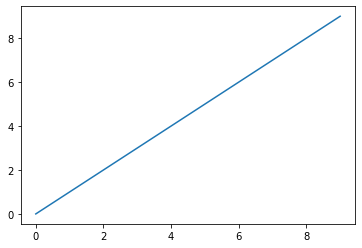

In [3]:
plt.plot(data)

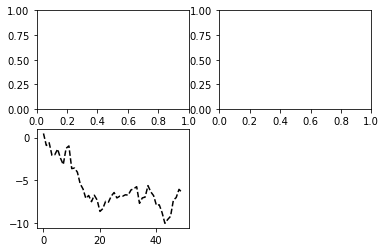

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [13]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))


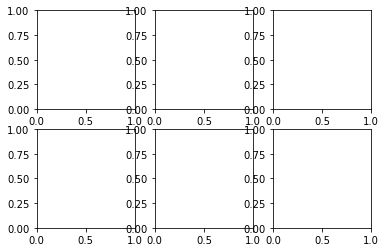

In [14]:
fig, axes = plt.subplots(2,3)

In [15]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

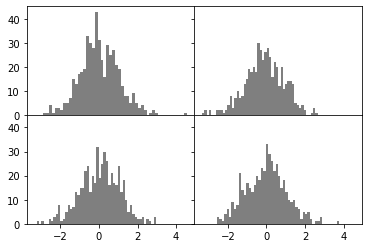

In [17]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
        for j in range(2):
                axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=.5)

plt.subplots_adjust(wspace=0, hspace=0)

In [18]:
ax.plot(x, y, 'g--')

NameError: name 'ax' is not defined

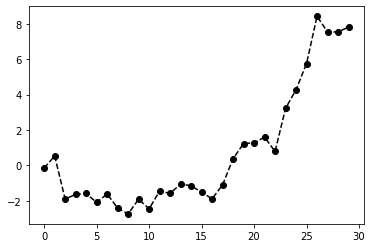

In [20]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

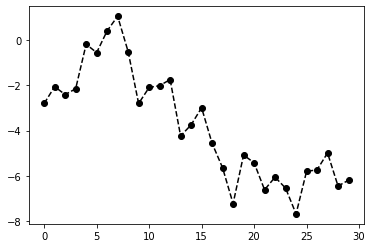

In [22]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

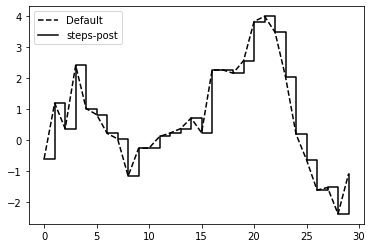

In [27]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')